In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=da54b026605e8baa9cf03c505824fe6e


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | ilirska bistrica
Processing Record 2 of Set 12 | flinders
Processing Record 3 of Set 12 | severnoye
Processing Record 4 of Set 12 | peniche
Processing Record 5 of Set 12 | saint anthony
Processing Record 6 of Set 12 | puerto ayora
Processing Record 7 of Set 12 | tasiilaq
Processing Record 8 of Set 12 | katsuura
Processing Record 9 of Set 12 | jumla
Processing Record 10 of Set 12 | saint george
Processing Record 11 of Set 12 | punta arenas
Processing Record 12 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 12 | banda aceh
Processing Record 14 of Set 12 | atuona
Processing Record 15 of Set 12 | avarua
Processing Record 16 of Set 12 | junction city
Processing Record 17 of Set 12 | itarema
Processing Record 18 of Set 12 | nouadhibou
Processing Record 19 of Set 12 | college
Processing Record 20 of Set 12 | nemuro
Processing Record 21 of Set 12 | turayf
Processing Record

Processing Record 32 of Set 15 | quatre cocos
Processing Record 33 of Set 15 | brae
Processing Record 34 of Set 15 | wilmington
Processing Record 35 of Set 15 | sao filipe
Processing Record 36 of Set 15 | barrow
Processing Record 37 of Set 15 | orocue
Processing Record 38 of Set 15 | khatanga
Processing Record 39 of Set 15 | mairi
Processing Record 40 of Set 15 | shingu
Processing Record 41 of Set 15 | chapais
Processing Record 42 of Set 15 | amderma
City not found. Skipping...
Processing Record 43 of Set 15 | alugan
Processing Record 44 of Set 15 | victoria
Processing Record 45 of Set 15 | la ronge
Processing Record 46 of Set 15 | camacha
Processing Record 47 of Set 15 | north bend
Processing Record 48 of Set 15 | narsaq
Processing Record 49 of Set 15 | sawakin
Processing Record 50 of Set 15 | tazmalt
Processing Record 1 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 16 | staro nagoricane
City not found. Skipping...
Processing Record 3 of Set 16 | ozern

Processing Record 19 of Set 19 | tual
Processing Record 20 of Set 19 | telimele
Processing Record 21 of Set 19 | parrita
Processing Record 22 of Set 19 | oranjemund
Processing Record 23 of Set 19 | morant bay
Processing Record 24 of Set 19 | san lorenzo
Processing Record 25 of Set 19 | chabahar
Processing Record 26 of Set 19 | aksu
Processing Record 27 of Set 19 | srandakan
Processing Record 28 of Set 19 | hofn
Processing Record 29 of Set 19 | kuche
City not found. Skipping...
Processing Record 30 of Set 19 | trincomalee
Processing Record 31 of Set 19 | batagay-alyta
Processing Record 32 of Set 19 | saleaula
City not found. Skipping...
Processing Record 33 of Set 19 | awash
Processing Record 34 of Set 19 | inderborskiy
City not found. Skipping...
Processing Record 35 of Set 19 | launceston
Processing Record 36 of Set 19 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 19 | mae hong son
Processing Record 38 of Set 19 | salalah
Processing Record 39 of Set 19 | kilinochchi
Processi

Processing Record 5 of Set 23 | ternate
Processing Record 6 of Set 23 | novobiryusinskiy
Processing Record 7 of Set 23 | naryan-mar
Processing Record 8 of Set 23 | palu
Processing Record 9 of Set 23 | gamba
Processing Record 10 of Set 23 | haaltert
Processing Record 11 of Set 23 | capiata
Processing Record 12 of Set 23 | hue
Processing Record 13 of Set 23 | krasnoarmeysk
Processing Record 14 of Set 23 | santa vitoria do palmar
Processing Record 15 of Set 23 | kushima
Processing Record 16 of Set 23 | khoy
Processing Record 17 of Set 23 | trairi
Processing Record 18 of Set 23 | alexandria
Processing Record 19 of Set 23 | morristown
Processing Record 20 of Set 23 | zermatt
Processing Record 21 of Set 23 | zholymbet
Processing Record 22 of Set 23 | baykit
Processing Record 23 of Set 23 | gaya
Processing Record 24 of Set 23 | kiunga
Processing Record 25 of Set 23 | villaviciosa
Processing Record 26 of Set 23 | mirador
Processing Record 27 of Set 23 | isabela
Processing Record 28 of Set 23 |

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ilirska Bistrica,45.5697,14.2408,42.01,77,8,3.89,SI,2021-04-23 23:09:30
1,Flinders,-34.5833,150.8552,64.00,75,92,1.99,AU,2021-04-23 23:09:30
2,Severnoye,56.3491,78.3619,30.92,79,0,2.89,RU,2021-04-23 23:09:31
3,Peniche,39.3558,-9.3811,59.00,90,46,5.01,PT,2021-04-23 23:09:31
4,Saint Anthony,45.0205,-93.2180,48.20,81,90,1.68,US,2021-04-23 23:09:31
5,Puerto Ayora,-0.7393,-90.3518,84.20,74,20,18.41,EC,2021-04-23 23:09:32
6,Tasiilaq,65.6145,-37.6368,37.40,52,75,16.11,GL,2021-04-23 23:09:32
7,Katsuura,35.1333,140.3000,57.20,58,20,4.61,JP,2021-04-23 23:09:32
8,Jumla,29.2747,82.1838,42.10,80,73,5.95,NP,2021-04-23 23:09:32
9,Saint George,37.1041,-113.5841,82.00,8,1,16.11,US,2021-04-23 23:09:33


In [17]:
new_column_order = ["City", "Country", "Date", 'Lat', "Lng", "Max Temp", "Humidity", "Cloudiness", 'Wind Speed']
new_column_order
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilirska Bistrica,SI,2021-04-23 23:09:30,45.5697,14.2408,42.01,77,8,3.89
1,Flinders,AU,2021-04-23 23:09:30,-34.5833,150.8552,64.00,75,92,1.99
2,Severnoye,RU,2021-04-23 23:09:31,56.3491,78.3619,30.92,79,0,2.89
3,Peniche,PT,2021-04-23 23:09:31,39.3558,-9.3811,59.00,90,46,5.01
4,Saint Anthony,US,2021-04-23 23:09:31,45.0205,-93.2180,48.20,81,90,1.68


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

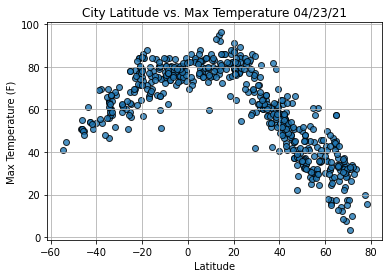

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

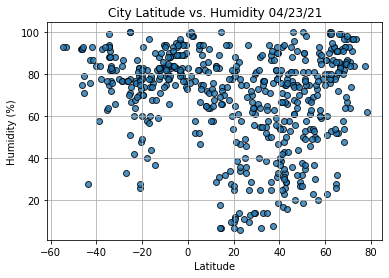

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

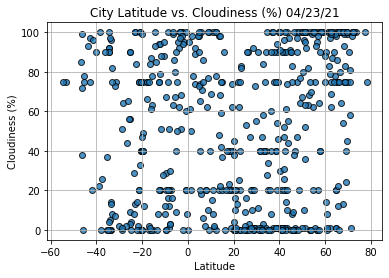

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


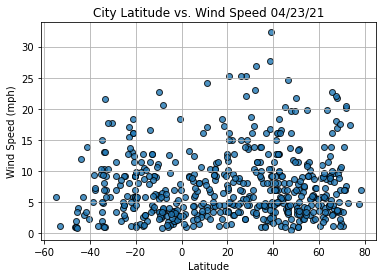

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [50]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [56]:
index13 = city_data_df.loc[13]
index13

City                       Avarua
Country                        CK
Date          2021-04-23 23:09:34
Lat                      -21.2078
Lng                      -159.775
Max Temp                     84.2
Humidity                       70
Cloudiness                     20
Wind Speed                  18.41
Name: 13, dtype: object

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilirska Bistrica,SI,2021-04-23 23:09:30,45.5697,14.2408,42.01,77,8,3.89
2,Severnoye,RU,2021-04-23 23:09:31,56.3491,78.3619,30.92,79,0,2.89
3,Peniche,PT,2021-04-23 23:09:31,39.3558,-9.3811,59.00,90,46,5.01
4,Saint Anthony,US,2021-04-23 23:09:31,45.0205,-93.2180,48.20,81,90,1.68
6,Tasiilaq,GL,2021-04-23 23:09:32,65.6145,-37.6368,37.40,52,75,16.11


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

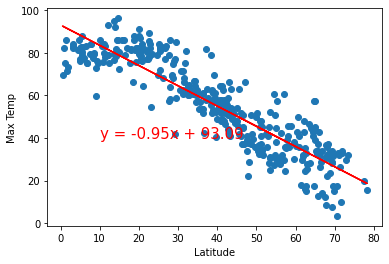

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

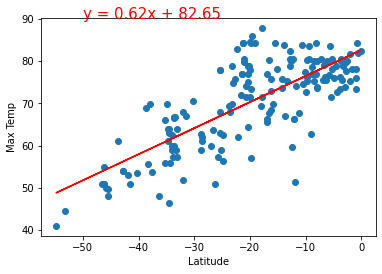

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

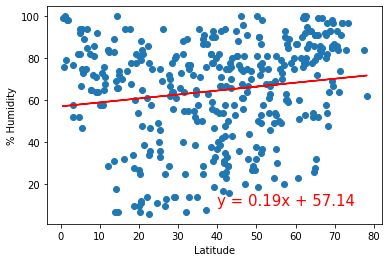

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

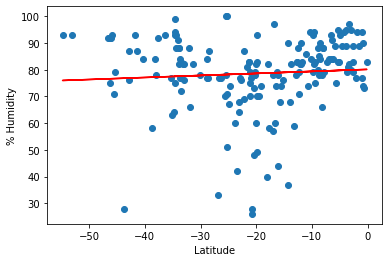

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

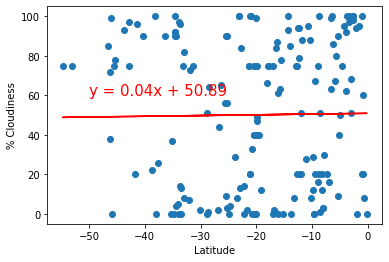

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

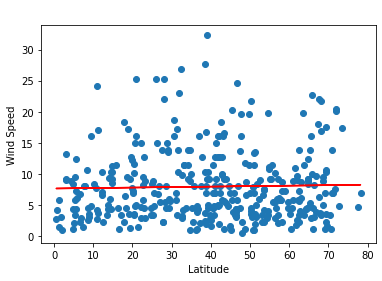

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

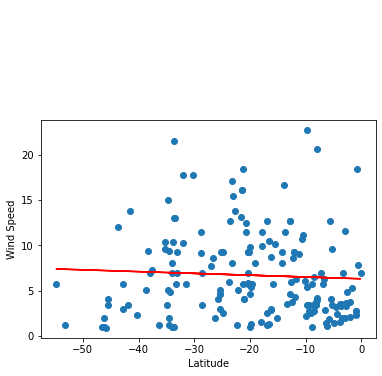

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))